# School - YRBS: Parents

As it said in issue [#12](https://github.com/mozilla-outreachy-datascience/outreachy-datascience/issues/12), there are students that gave informations about their caregivers, e.g. ```my mother and father```, ```my mother and a step parent```, ```my mother only```. And, some of students have missing information about it.

The goal is to separate information, as ```my mother and my father``` in to differents informations (```mother```, ```father```), for all the values in the column ```parents``` , furthermore show the distribution of each single caregiver.

This file is solution proposal of the issue. 

## Import dependancy and Reading CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
school_df = pd.read_csv("../school-yrbs/Somerville_High_School_YRBS_Raw_Data_2002-2016.csv")

In [3]:
print(school_df)

     survey             id                    age  gender             grade  \
0      SH16  English - SHS           15 years old  Female  Sophomore - 10th   
1      SH16              2           16 years old    Male  Sophomore - 10th   
2      SH16              3           16 years old    Male  Sophomore - 10th   
3      SH16              4  18 years old or older    Male     Senior - 12th   
4      SH16              5  18 years old or older    Male     Senior - 12th   
5      SH16              6  18 years old or older    Male     Senior - 12th   
6      SH16              8  18 years old or older    Male     Senior - 12th   
7      SH16             10  18 years old or older    Male     Senior - 12th   
8      SH16             12  18 years old or older    Male     Senior - 12th   
9      SH16             13           17 years old    Male     Senior - 12th   
10     SH16             14           17 years old    Male     Senior - 12th   
11     SH16             15  18 years old or older   

## Data Preprocessing

The inicial action is to replace empty fields with "Unknow" to better treat the data.

In [4]:
# Before preprocessing
school_df.tail()

,survey,id,age,gender,grade,race,language,live_us,parents,home,...,chew_age,fr_smok,fr_alc,fr_pot,fr_oth,talk_sex,study_7,read_7,work_7,stren_7
8866,SH06,2032,15 years old,Female,Freshman - 9th,White,English,,,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8867,SH06,2033,14 years old,Female,Freshman - 9th,White,English,,,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8868,SH06,2034,14 years old,Female,Freshman - 9th,Hispanic or Latino,Spanish,,,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8869,SH06,2035,17 years old,Male,Senior - 12th,,English,,,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8870,SH06,2036,17 years old,Female,Junior - 11th,Black,Portuguese,,,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# After preprocessing
school_df.replace(regex=r'^\s*$', value='Unknown', inplace=True)
school_df.tail()

,survey,id,age,gender,grade,race,language,live_us,parents,home,...,chew_age,fr_smok,fr_alc,fr_pot,fr_oth,talk_sex,study_7,read_7,work_7,stren_7
8866,SH06,2032,15 years old,Female,Freshman - 9th,White,English,Unknown,Unknown,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8867,SH06,2033,14 years old,Female,Freshman - 9th,White,English,Unknown,Unknown,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8868,SH06,2034,14 years old,Female,Freshman - 9th,Hispanic or Latino,Spanish,Unknown,Unknown,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8869,SH06,2035,17 years old,Male,Senior - 12th,Unknown,English,Unknown,Unknown,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8870,SH06,2036,17 years old,Female,Junior - 11th,Black,Portuguese,Unknown,Unknown,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using pandas function ```get_dummies```, It's define that each value in "parents" column is a dummy variable.

In other words, the original column is split in K variables, where K is the number of values in it. Then it variable thats on the value 0 or 1.

In [6]:
# Only for show how the table of dummy variables works
pd.get_dummies(school_df.parents)

,"Another relative (like a grandparent, aunt/uncle)",Foster parent(s),My father and a step-parent,My father only,My mother and a step-parent,My mother and my father,My mother only,Someone else not on this list,Unknown
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,1,0,0,0


If We that line 1 as example, We can see that only the column ```My mother and my father``` has the value 1. That's because in the original column ```parents```, in line, is filled with ```My mother and my father```

Then, with a list of unique values in the column ```parents```, It creates a new column with the values of similar columns, e.g. ```My mother and my father```, ```My mother only``` and ```My mother and a step-parent```, into a single column ```Mother```

In [43]:
dummies = pd.get_dummies(school_df.parents)
parents_values = school_df['parents'].unique()

mother_list = []
father_list = []
step_list = []

for value in parents_values:
    if value.find('mother') != -1:
        mother_list.append(value)
        if value.find('step-parent') != -1:
            step_list = [value] 
    elif value.find('father') != -1:
        father_list = [value]
        if value.find('step-parent') != -1:
            step_list = [value] 

lists = [mother_list, father_list, step_list, 'Mother', 'Father', 'Step Parent']
for i in range(0,3):
    dummies = (pd.concat([dummies, dummies[lists[i]].sum(1)], axis=1)).rename(columns={0:lists[i+3]})
dummies


,"Another relative (like a grandparent, aunt/uncle)",Foster parent(s),My father and a step-parent,My father only,My mother and a step-parent,My mother and my father,My mother only,Someone else not on this list,Unknown,Mother,Father,Step Parent
0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,0,0
5,0,0,0,0,0,1,0,0,0,1,0,0
6,0,0,0,0,0,0,1,0,0,1,0,0
7,0,0,0,0,0,0,1,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0,1,0,0
9,0,0,0,0,0,1,0,0,0,1,0,0


# Caregivers Distribution

In [128]:
ax = ['Another relative (like a grandparent, aunt/uncle)','Foster parent(s)', 'Someone else not on this list', 'Unknown', 'Mother', 'Father', 'Step Parent']
ay = []
for name in ax:
    ay.append((dummies[name].value_counts()).get(1))
    
for i in range(len(ax)):
    print(ax[i],':', ay[i])

Another relative (like a grandparent, aunt/uncle) : 226
Foster parent(s) : 16
Someone else not on this list : 92
Unknown : 3917
Mother : 4392
Father : 76
Step Parent : 76


## Bar Chart

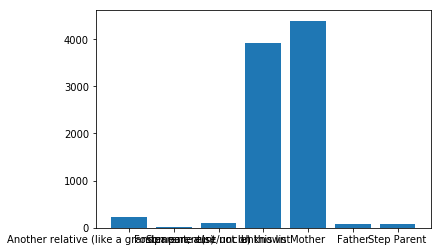

In [122]:
fig1, ax1 = plt.subplots()
ax1.bar(ax, ay)
plt.show()

# Pie Chart

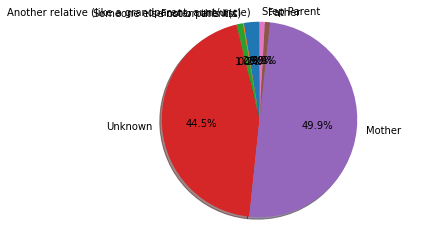

In [113]:

    
fig1, ax1 = plt.subplots()
ax1.pie(ay, labels=ax, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()